(only tesed on Python 3.6)

this notebook shows how to use the stereo module in leelab toolbox to handle CMU stereo dataset.

In [1]:
# change `inline` to `notebook` if you want to rotate the 3D plot.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os.path
from leelabtoolbox.stereo import io as stereo_io, conversion as stereo_conversion
from leelabtoolbox.stereo.conversion import CoordinatesCart
from copy import copy
from skimage.io import imread

In [2]:
example_scene_file = os.path.join('..','tests','stereo_ref','utexas','lRange005.mat')
scene_struct = stereo_io.read_utexas_natural_scene_stereo_database(example_scene_file)

In [3]:
# number of bad points.
scene_struct['mask'].mean()

0.0069560185185185185

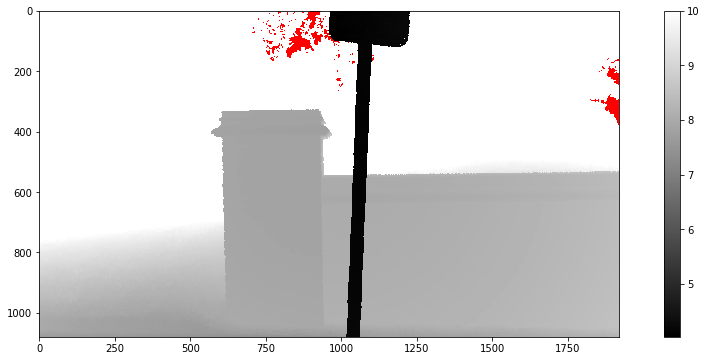

4.03173 296.501


In [4]:
distance_mask = scene_struct['mask']
distance = np.sqrt(scene_struct['x']**2+scene_struct['y']**2+scene_struct['z']**2)
distance[distance_mask]=np.nan
cmap=copy(matplotlib.cm.gray)
# set nan to red
# <https://stackoverflow.com/questions/2578752/how-can-i-plot-nan-values-as-a-special-color-with-imshow-in-matplotlib>
# <https://stackoverflow.com/questions/35905393/python-leave-numpy-nan-values-from-matplotlib-heatmap-and-its-legend>
cmap.set_bad('red')
# show the range map
plt.close('all')
plt.figure(figsize=(16, 6))
plt.imshow(distance, cmap=cmap, vmax=10)
plt.colorbar()
plt.show()
print(np.nanmin(distance), np.nanmax(distance))

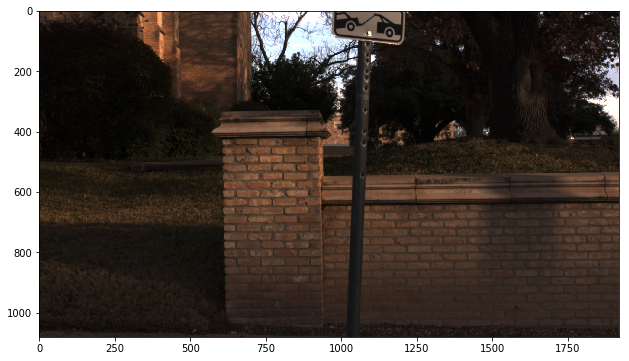

In [5]:
# show color image
# this is not original image. I applied some auto balance on the original using Preview on Mac.
# just to give you an idea what it looks like.
color_image = imread(os.path.join('..','tests','stereo_ref','utexas','lImage005.png'))
plt.close('all')
plt.figure(figsize=(16, 6))
plt.imshow(color_image)
plt.show()

In [6]:
# then convert to xyz.
valid_mask = np.logical_not(distance_mask)
xyz_valid = CoordinatesCart(scene_struct['x'][valid_mask],
                            scene_struct['y'][valid_mask],
                            scene_struct['z'][valid_mask])

# whether multiply by 2 or not for 'bearing':
# if you use the below one, where we don't multiply by 2 for bearing in Brown, and if you pan over the below 3D plot,
# you will that it makes no sense.

# xyz_valid = stereo_conversion.sph2cart(scene_struct_2['distance'][valid_mask],
#                                        scene_struct_2['latitude'][valid_mask],
#                                        scene_struct_2['longitude'][valid_mask], convention='retina2')

# whether the unit of inclination is correct.
# based on printed out values below, you can see that this the camera is surrounded by the captured scene, and you 
# can find points behind camera (positive z) as well.
# based on panning the below 3D plot, it seems that unit of inclination is correct.

print(xyz_valid.z.min(), xyz_valid.z.max())

-292.622 -3.97405


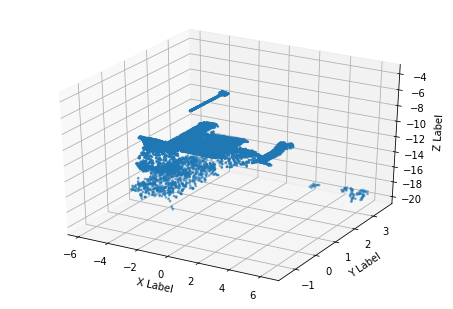

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# randomly sample 30000 points.
rng_state = np.random.RandomState(seed=0)
xyz_valid = np.asarray(xyz_valid)
xyz_valid_reduced = xyz_valid[:, rng_state.choice(xyz_valid.shape[1], 10000)]
# restrict depth, so that I can find the sign in the scatter plot... too many points.
xyz_valid_reduced = xyz_valid_reduced[:,xyz_valid_reduced[2]>-20]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*xyz_valid_reduced, s=3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()